# Theorische vragen Deep Learning

Sabine De Vreese, Stijn Lievens en Simon De Gheselle

11 oktober 2025

## Inleiding
Hieronder vind je een vragenlijst die je kan helpen bij het studeren voor het theorie-examen van het opleidingsonderdeel Deep Learning. Veel vragen op het theorie-examen zullen gebaseerd zijn op de lijst van onderstaande vragen. Het is dus een goed idee als je minstens deze vragen kan beant-woorden op het moment dat je het examen aflegt.

## Hoofdstuk 15: Verwerken van Sequenties met RNNs en CNNs
1. (Oefening 1 uit het boek) Bedenk enkele toepassingen van een
- sequentie-naar-sequentie RNN,
    - **Tijdreeksen/voorspellingen**
      - Weervoorspelling
      - Beurskoers
      - ...
    - **Audio/spraak**
      - Speech-to-text (STT)
      - Text-to-Speech (TTS)
    - **Taal/Tekst**
      - Machinevertaling
      - Samenvatten
    ```text
    y_0    y_1     y_2     y_3
    ^      ^       ^       ^
    |      |       |       |
    h_0 -> h_1 -> h_2  -> h_3
    ^      ^       ^       ^
    |      |       |       |
    x_0    x_1    x_2      x_3
    ```
    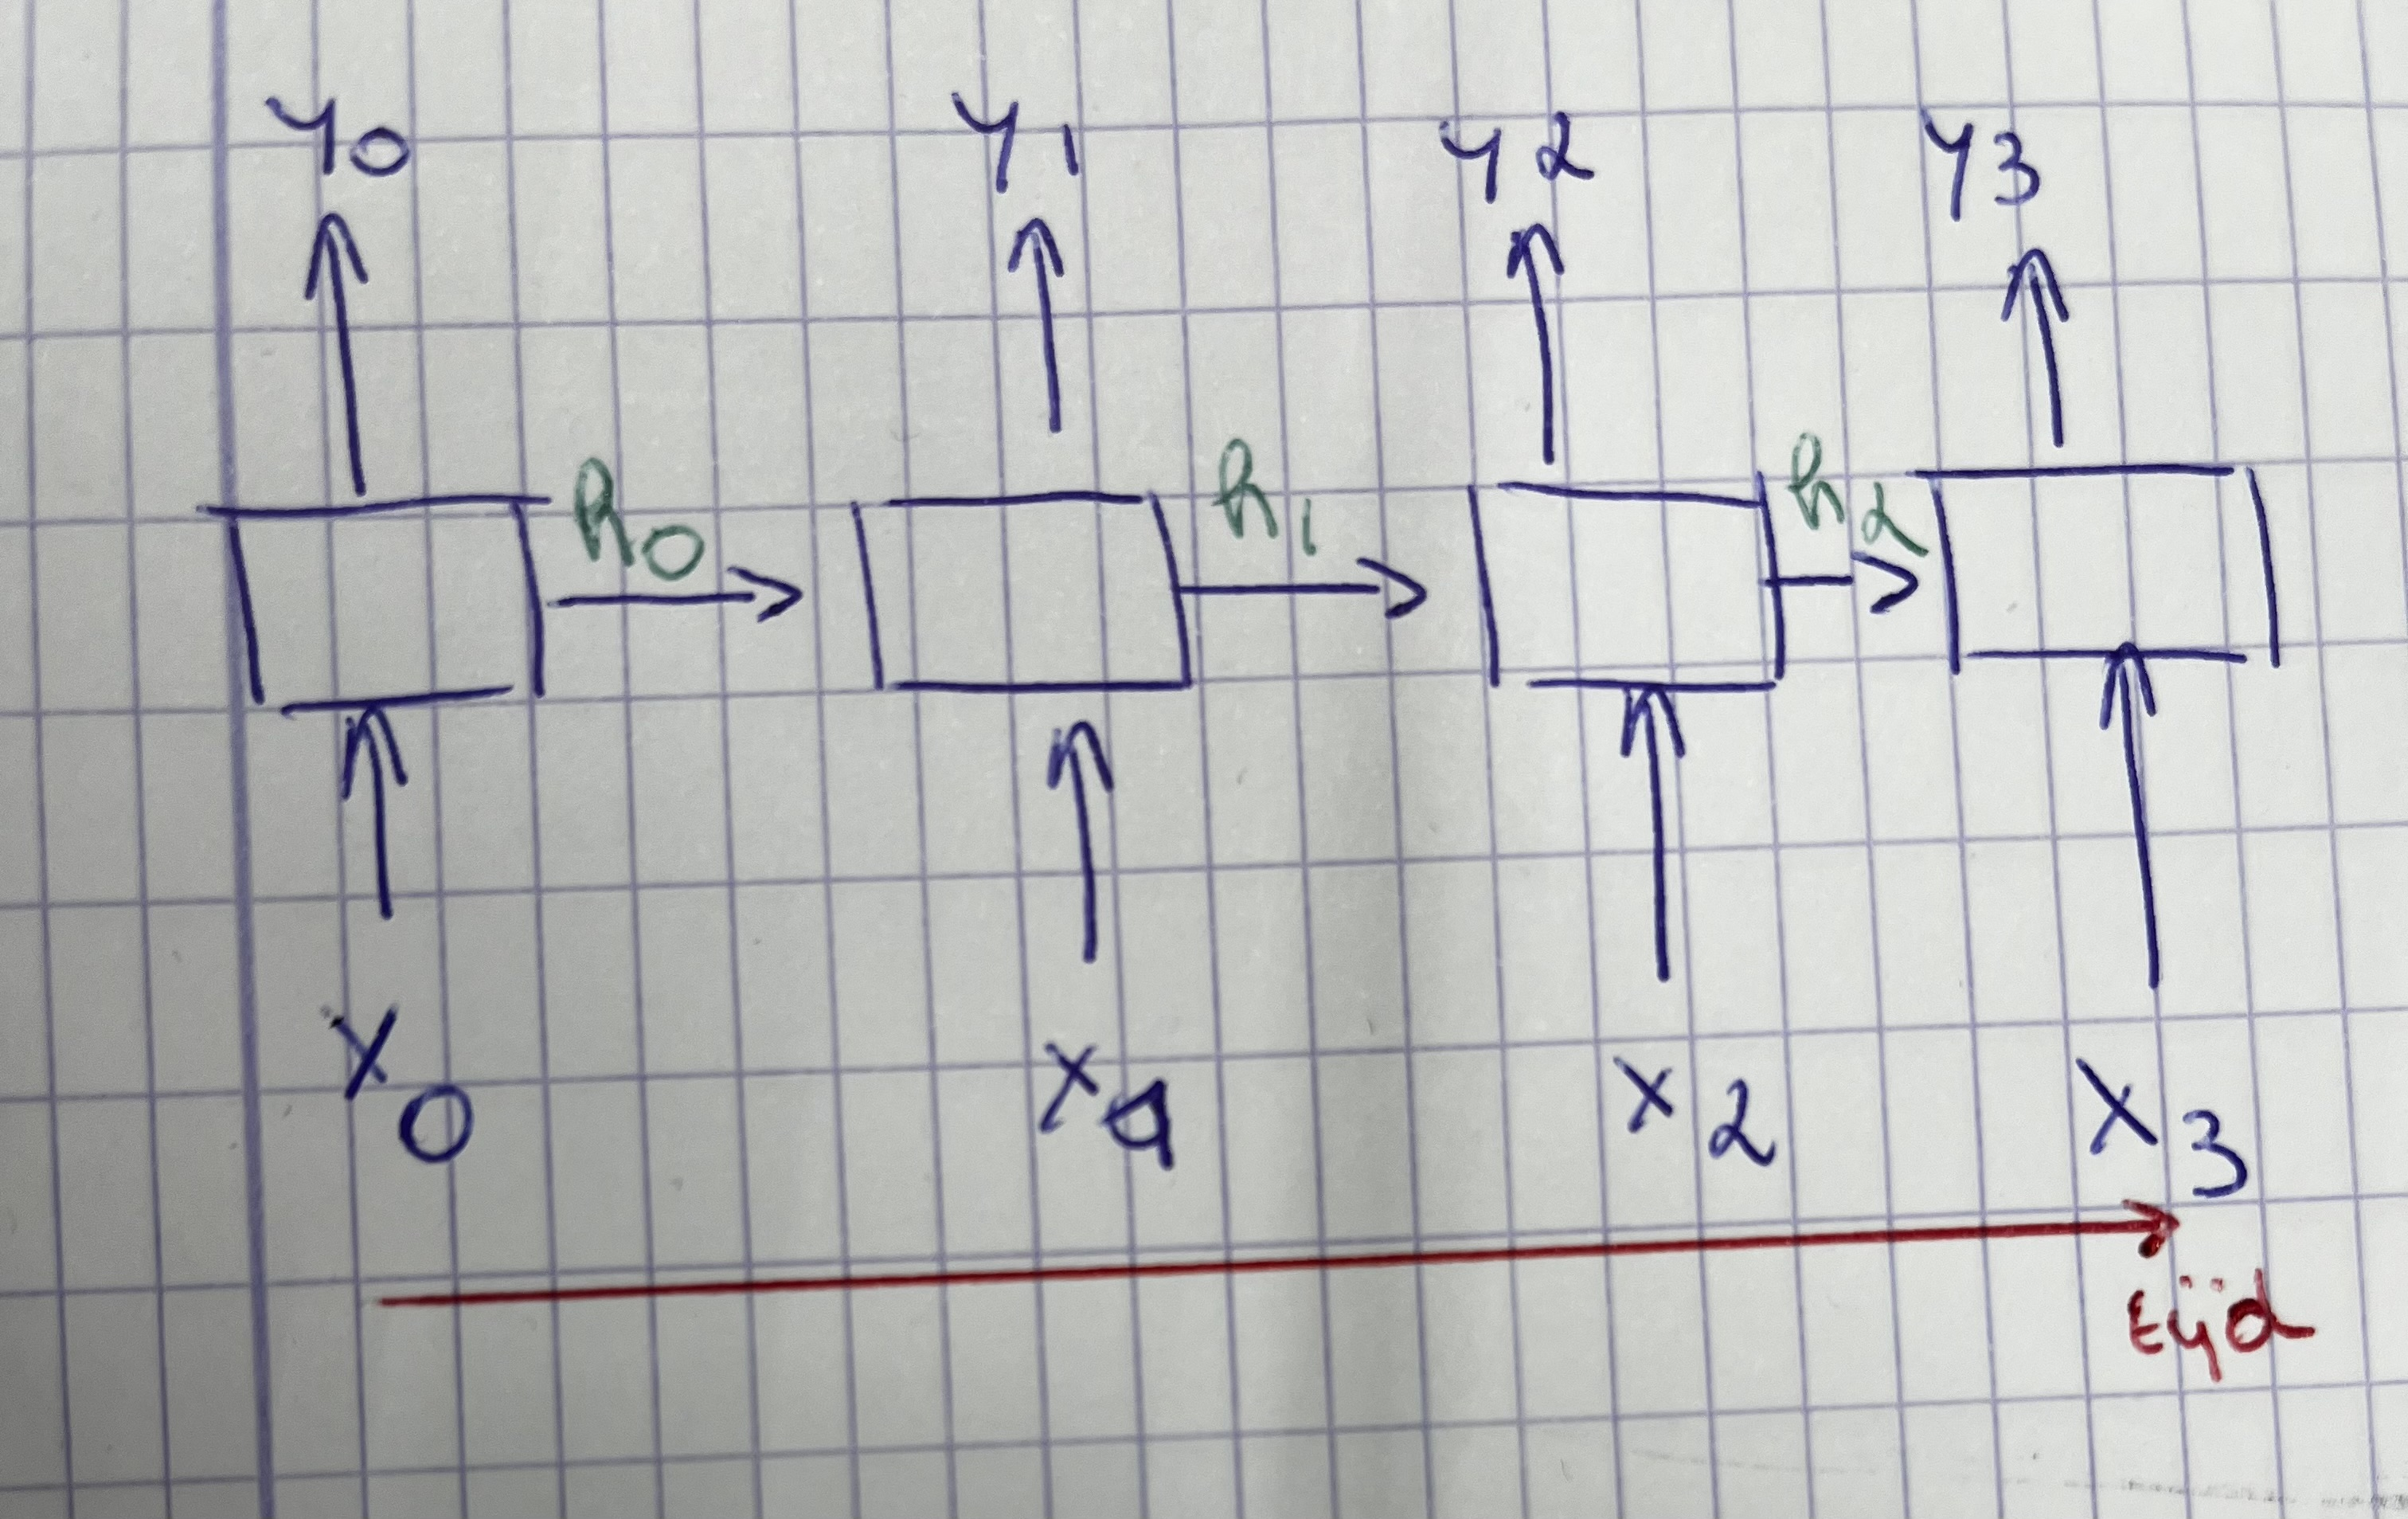
- sequentie-naar-vector RNN,
    - **Sentiment analyse (class.)**
    - **Document classificatie**
    ```text
        IGNORED OUTPUTS   y_3
    -      -       -       ^
    |      |       |       |
    h_0 -> h_1 -> h_2  -> h_3
    ^      ^       ^       ^
    |      |       |       |
    x_0    x_1    x_2      x_3
    ```
    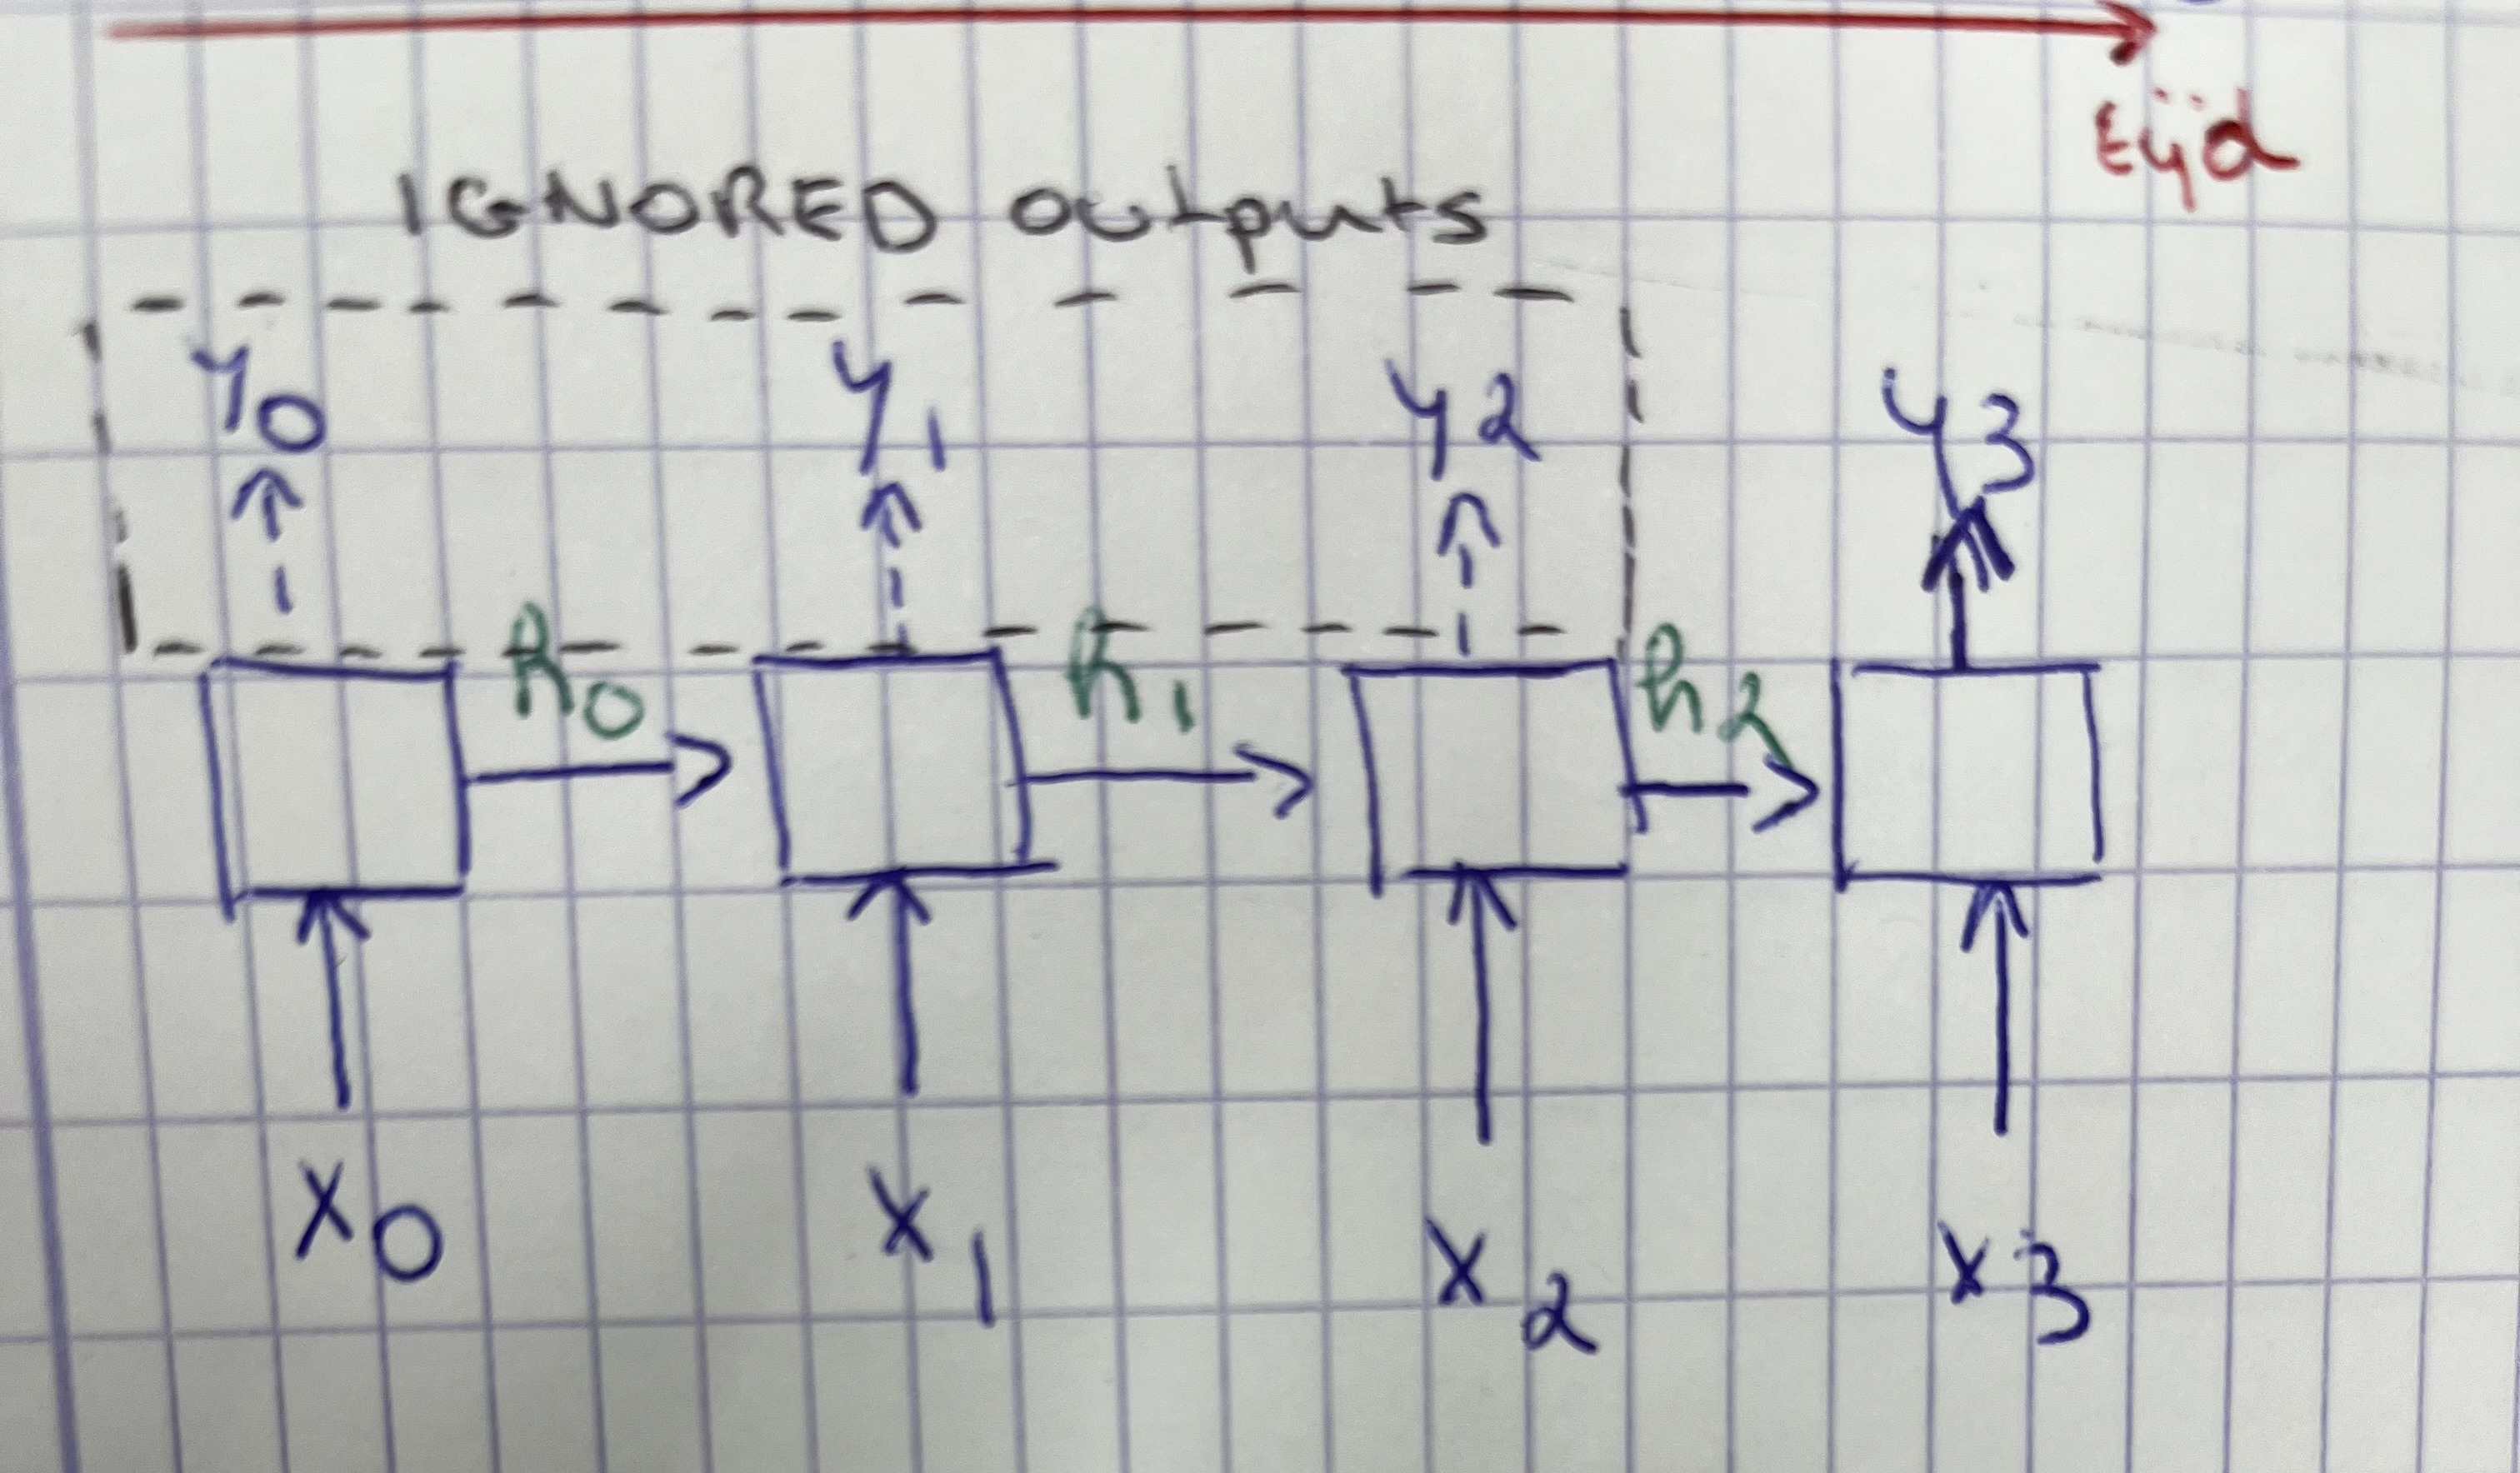
- vector-naar-sequentie RNN.
    - **Beeldbeschrijving**
    - **MuziekGeneratie**
    - **Tekstgeneratie obv een topic**
    ```text
    y_0    y_1     y_2     y_3
    ^      ^       ^       ^
    |      |       |       |
    h_0 -> h_1 -> h_2  -> h_3
    ^      ^       ^       ^
    |      |       |       |
    x      x       x       x
    ```
    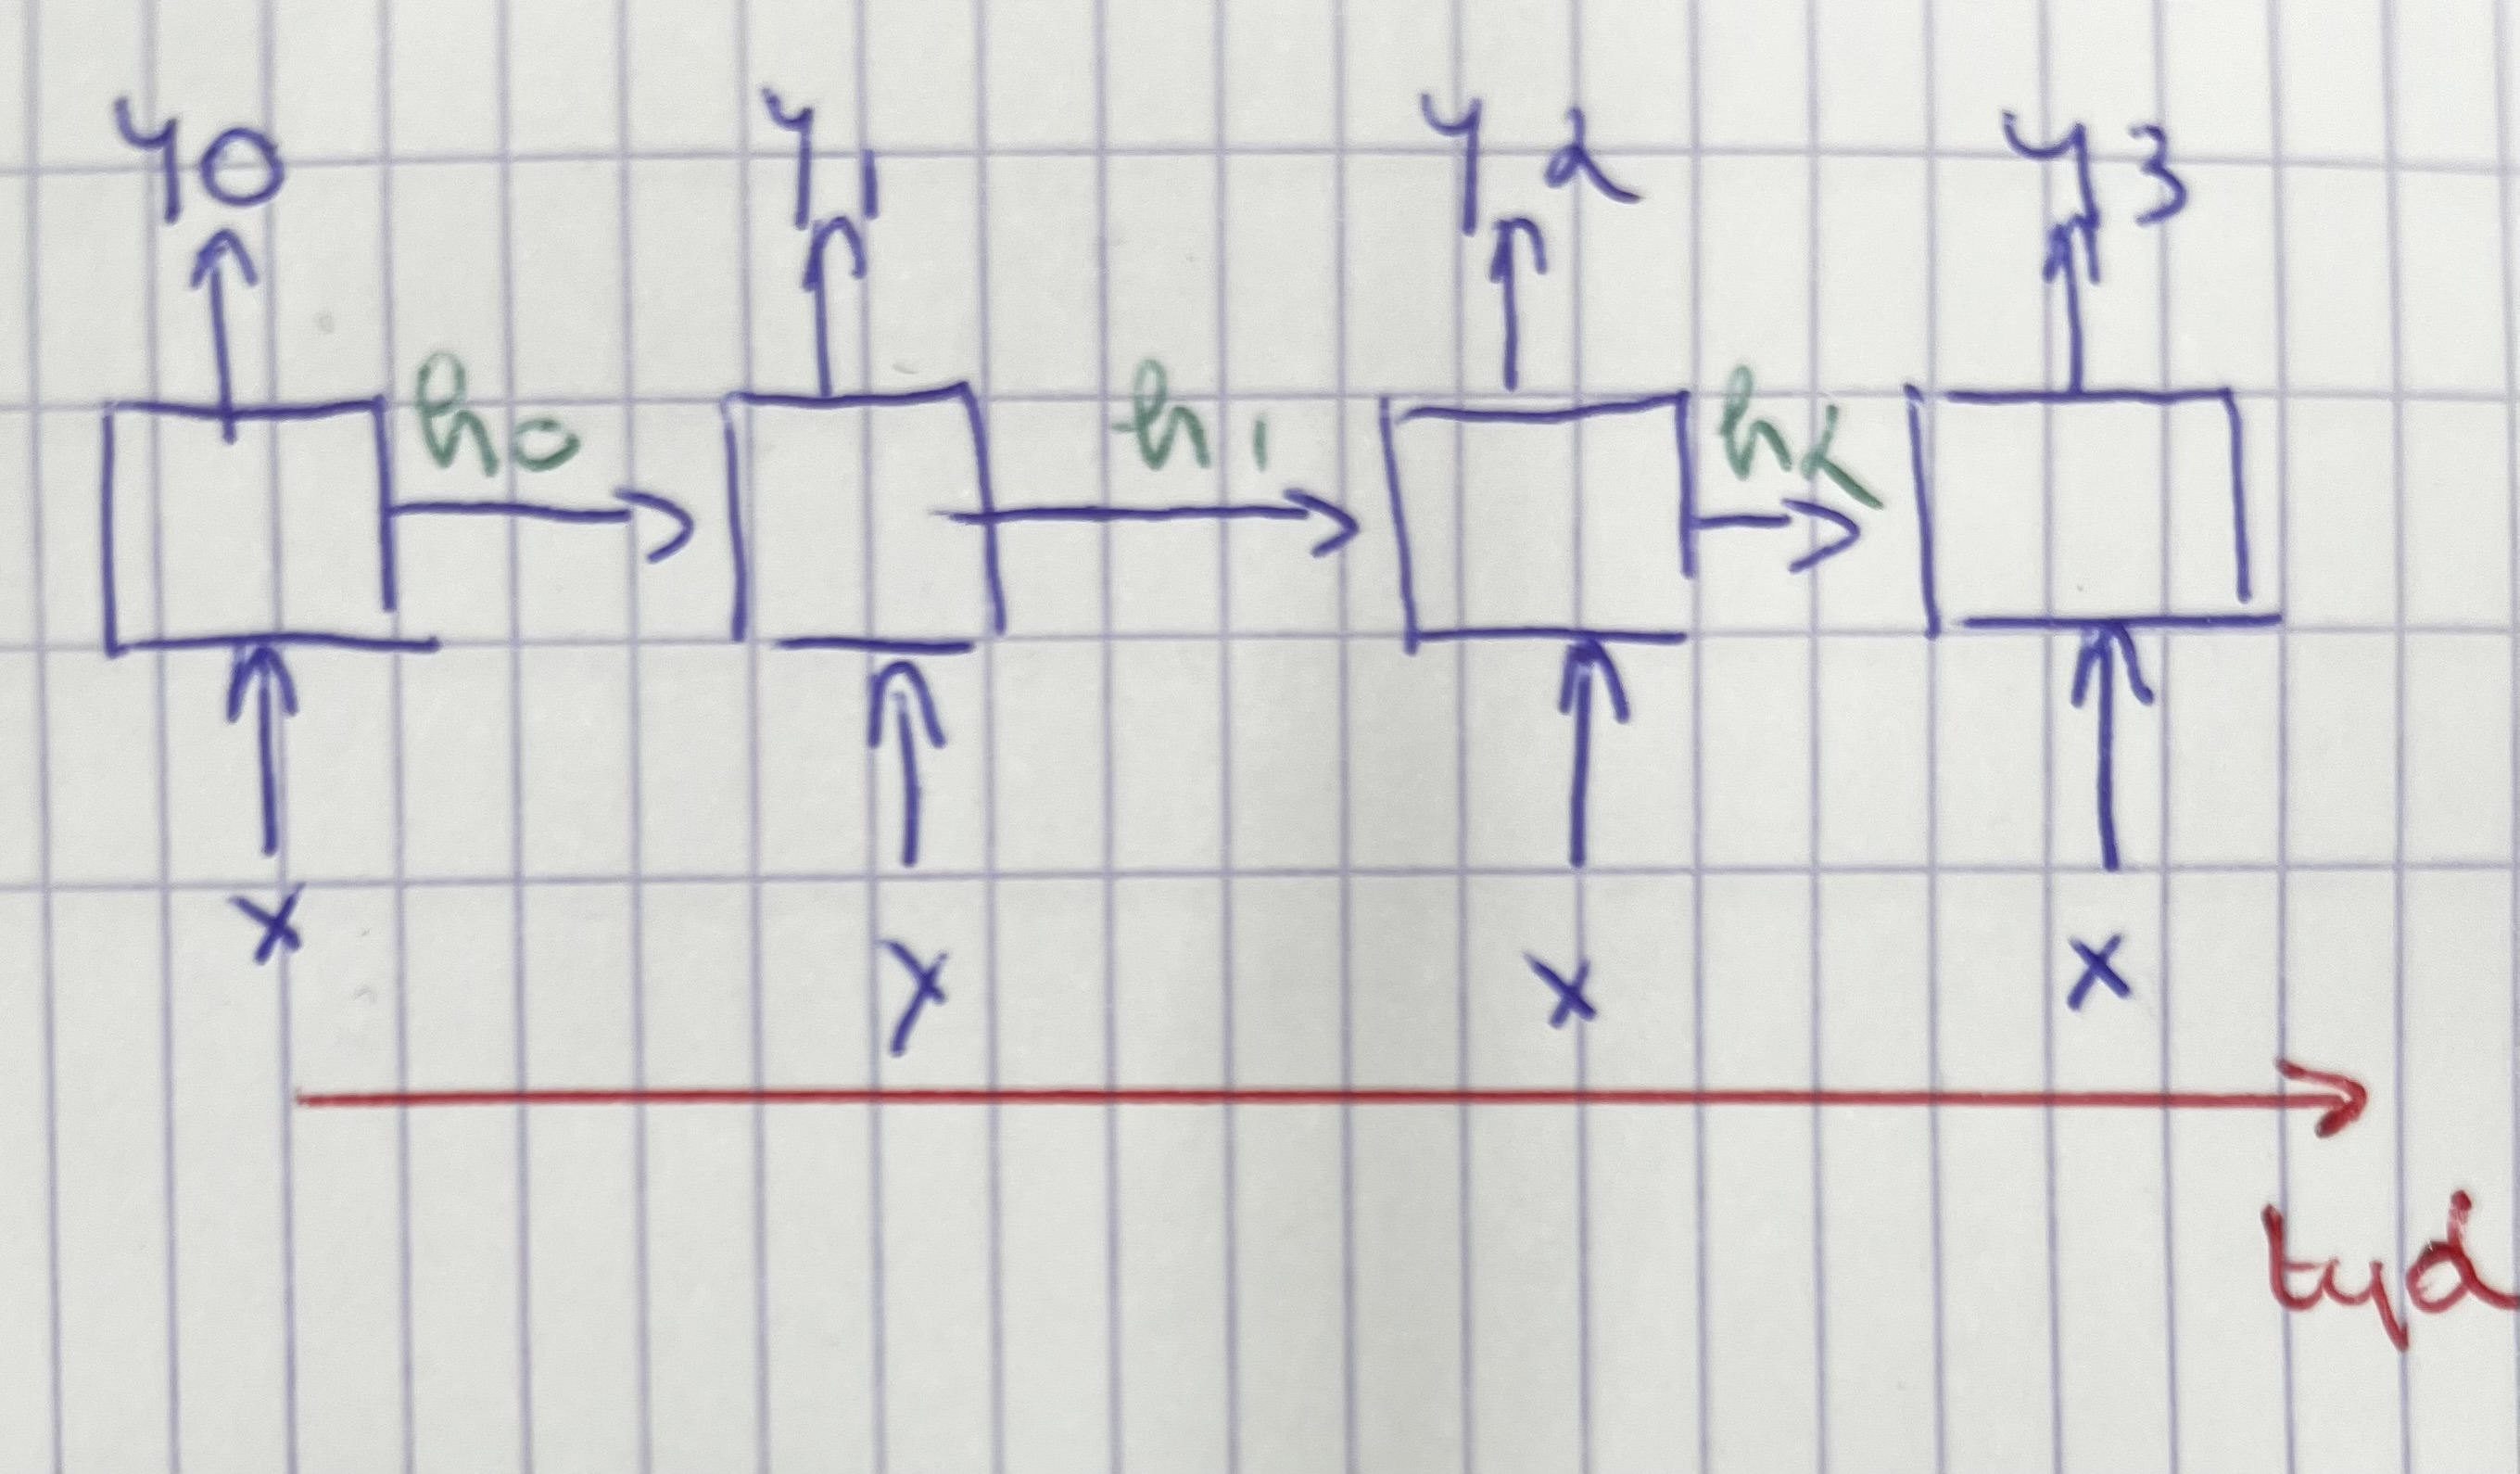
- Encoder-Decorder RNN,
    ```text
    ENCODER
        IGNORED OUTPUTS   y_3
    -      -       -       ^
    |      |       |       |
    h_0 -> h_1 -> h_2  -> h_3
    ^      ^       ^       ^
    |      |       |       |
    x_0    x_1    x_2      x_3
    
    DECODER: Output van ENCODER is input van DECODER
    y_0    y_1     y_2     y_3
    ^      ^       ^       ^
    |      |       |       |
    h_0 -> h_1 -> h_2  -> h_3
    ^      ^       ^       ^
    |      |       |       |
    x      x       x       x
    ```
    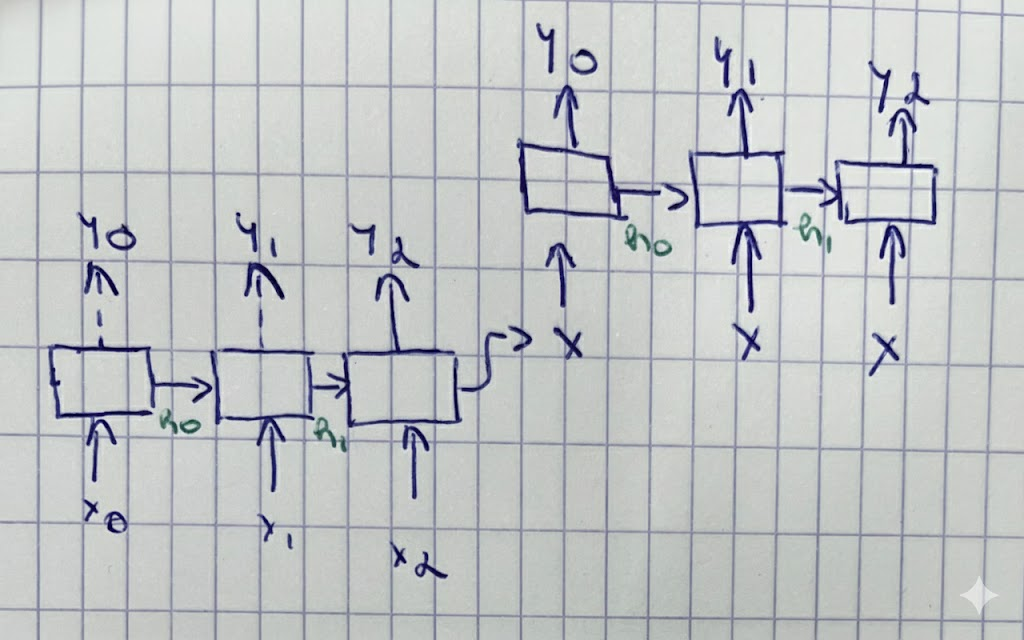 

**Deze RNNs hebben enkele problemen, zoals**:
- Vanishing gradients $\rightarrow$ Verdwijning van gradiënten
- Exploding gradients $\rightarrow$ Explosie van gradiënten, waardoor de gewichten te groot worden.
- Sequentiële traagheid $\rightarrow$ Omdat RNNs sequentieel werken, kunnen ze niet goed geparallelliseerd worden.

**Oplossingen hiervoor zijn**:
- LSTM (Long Short-Term Memory) en GRU (Gated Recurrent Unit) cellen, die de gradiënten beter behouden.
- Attention, directe verbindingen tussen tijdstappen.

2. (Oefening 2 uit het boek) Hoeveel dimensies heeft de invoer voor een RNN-laag? Wat stelt elke dimensie voor? Hoeveel dimensies heeft de uitvoer van een RNN? Wat stellen die voor?
    - Invoer van RNN-laag heeft **drie** dim. `(Batch_size, Seq_len, Features)`
    - Uitvoer van RNN-laag: 
      - Seq-2-Seq: (batch, timesteps, features) $\rightarrow$ (batch, timesteps,units)
      - Seq-2-Vector: (batch, timesteps, features) $\rightarrow$ (batch_size, units)

Recap:
| Laag type  | Input shape                     | Output shape                   |
|------------|---------------------------------|--------------------------------|
| RNN (S2S)  | (batch, timesteps, features)    | (batch, timesteps, units)      |
| RNN (S2V)  | (batch, timesteps, features)    | (batch, units)                 |
| RNN (V2S)  | (batch, features)               | (batch, timesteps, units)      |
| CNN        | (height, width, channels)       | (height, width, filters)       |
| DNN        | (features,)                     | (units,)                       |


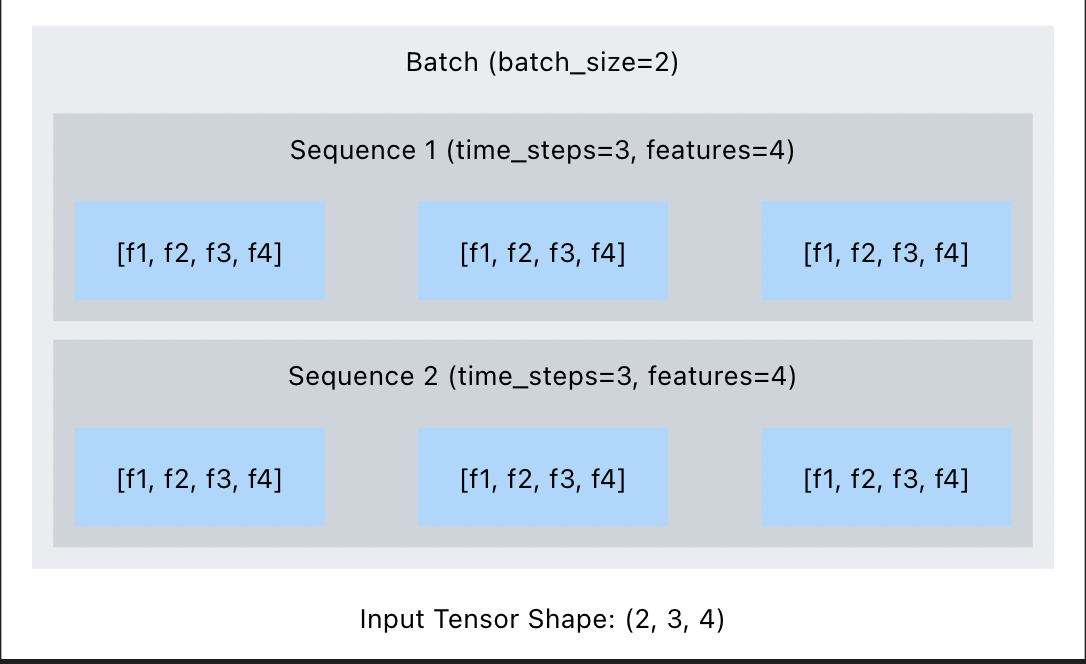

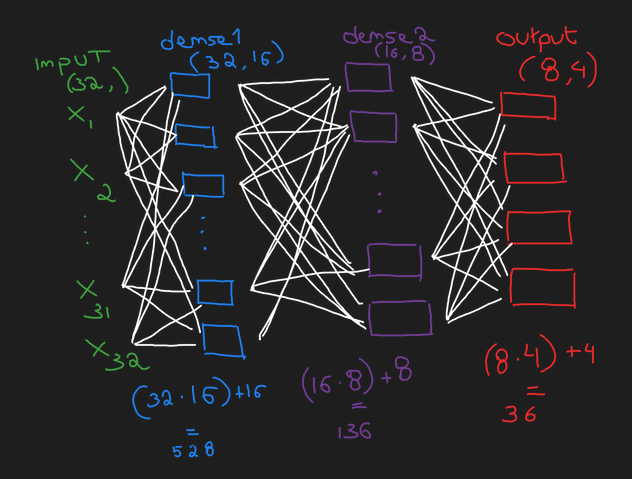

In [37]:
# Functional API practice
import keras as ks

input_ = ks.Input(shape=(32,))
dense = ks.layers.Dense(units=16, activation="relu")(input_)
dense = ks.layers.Dense(units=8, activation="relu")(dense)

output = ks.layers.Dense(units=4, activation="softmax")(dense)

model = ks.Model(inputs=input_,outputs=output)
model.summary()

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_47 (InputLayer)     │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 700 (2.73 KB)

 Trainable params: 700 (2.73 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model = ks.Sequential([
    ks.Input(shape=(56,1)),
    ks.layers.SimpleRNN(32,return_sequences=True),
    ks.layers.SimpleRNN(32),
    ks.layers.Dense(1)
])
model.summary()

input_ = ks.Input(shape=(56,1))
print("input_.shape: ",input_.shape)

#* (timesteps,features) -> (56,1)
simpleRnn = ks.layers.SimpleRNN(32,return_sequences=True)(input_)
print("simpleRnn.shape: ",simpleRnn.shape)
#! (batch, timesteps, units) -> (None, 56, 32)
#? prms: (input_dim + units + bias) * units -> (1 + 32 + 1) * 32 = 1 088


# simpleRnn_2
#* (batch, timesteps, features) -> (None, 56, 32)
simpleRnn = ks.layers.SimpleRNN(32)(simpleRnn)
print("simpleRnn.shape: ",simpleRnn.shape)
#! (batch, units) -> (None, 32)
#? prms: (input_dim + units + bias) * units -> (32 + 1 + 1) * 1 = 33


#* (features,) -> (32,)
dense = ks.layers.Dense(1)(simpleRnn)
print("dense.shape: ",dense.shape)
#! (batch,units) -> (None,1)
#? prms: (input_dim + bias) * units -> (32 + 1) * 1 = 33

model = ks.Model(inputs=input_,outputs=dense)


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_53 (SimpleRNN)       │ (None, 56, 32)         │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_54 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

input_.shape:  (None, 56, 1)
simpleRnn.shape:  (None, 56, 32)
simpleRnn.shape:  (None, 32)
dense.shape:  (None, 1)


3. (Oefening 3 uit het boek) Veronderstel dat je een diep sequentie-naar-sequentie RNN wil bouwen. Welke lagen in de RNN moeten `return_sequences=True` hebben? Wat wordt het antwoord op de vraag wanneer je een sequentie-naar-vector RNN wil bouwen?
    > bij een S2S RNN moet alle lagen `return_sequences=True` hebben.

    > bij een S2V moet alle lagen behalve de laatste, want je wilt een vector returnen.

4. (Oefening 8 uit het boek) Welke neuraal netwerk architectuur kan je gebruiken om video’s te classificeren?
    > Een video classificeren, is om een video in een 'hokje' of categorie te geven. Met andere woorden je moet een video inferencen en één waarde terug krijken, dus een S2V.
    > Naast RNN S2V is er ook CNN voor beeld.

5. Hoe creëren we training/validatie/test-onderverdeling voor tijdreeks-data? Op welke manier verschilt dit van de “standaard” manier om een training/validatie/test-onderverdeling te creëren?
    > Tijdreeks-data heeft een volgorde, want het gaat over een tijdreeks bv. data van lopers die de over de finish lijn komen. Standaard manier kan data zijn zonder tijd, zoals MNIST

6. Wat is “layer normalization”? Hoe werkt deze laag? Wat zijn de leerbareparameters? Hoe verhoudt “layer normalization” zich tot “batch normalization”? Hoe verhoudt het zich tot de Normalizationlaag?
    > Deze laag pakt de grote waarden en verkleint (verschaald) die, waarbij de normale norm laag het doet voor alle features (rij-gewijs) en batch norm per feature (kolom-gewijs)

7. Beschouw onderstaande code:
```python
model = keras.Sequential([
    keras.layers.Input(shape=[None, 5]),
    keras.layers.SimpleRNN(32, return_sequences=True)])
```
Beantwoord de volgende vragen:
- Geef de vorm (“shape”) van de invoer. Welke dimensies hebben een vaste grootte en welke dimensies kunnen eventueel variëren?
    > (batch, timesteps, features) $\rightarrow$ (None,None,5)
- Geef de vorm (“shape”) van de uitvoer. Leg uit op welke manier de vorm van de uitvoer bepaald wordt door de vorm van de invoer.
    > (batch, timesteps, units) $\rightarrow$  (None, None, 32)

In [46]:
model = ks.Sequential([
    ks.Input([None,5]),
    ks.layers.SimpleRNN(32, return_sequences=True)
])

model.summary()

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_64 (SimpleRNN)       │ (None, None, 32)       │         1,216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,216 (4.75 KB)

 Trainable params: 1,216 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
input_ = ks.layers.Input(shape=[None,5])
print("input_", input_.shape)
#! (None, 5)
simmpleRNN = ks.layers.SimpleRNN(32,return_sequences=True)(input_)
print("simmpleRNN", simmpleRNN.shape)
#! (batch, timesteps, units) -> (None, None, 32)
model = ks.Model(inputs=input_,outputs=simmpleRNN)
#* (5 + 1 +32) * 32 = 1 216
model.summary()

input_ (None, None, 5)
simmpleRNN (None, None, 32)


Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_58 (InputLayer)     │ (None, None, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_66 (SimpleRNN)       │ (None, None, 32)       │         1,216 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,216 (4.75 KB)

 Trainable params: 1,216 (4.75 KB)

 Non-trainable params: 0 (0.00 B)

- Welke activatiefunctie wordt er gebruikt
    > RNN hebben standaard `tanh` als activatie.
- Hoeveel parameters heeft dit model? Toon je werkwijze.
    > $(\text{input\_dim} + \text{units} + \text{bias}) * \text{units}$ $\rightarrow$ $(5 + 32 + 1) * 32 = 1\;216$

8. Welke soort lagen worden er gebruikt in WaveNet?\ 
   > Dilated Causal Convolutional Layers,  
   > - Dilated: Filter uitrekken (gaatjes tussen de punten). $\rightarrow$ Zorgen dat het model een heel lange geschiedenis ziet.
   > - Causal: Filter naar links verschuiven (padding links). $\rightarrow$ Voorkomen dat het model "spiekt" in de toekomst.

   Welk soort “padding” wordt er gebruikt?\ 
   > Causal Padding: er worden nullen toegevoegd aan de **linkerkant** (het verleden) van de input. (alleen kijken naar het verleden).

   Op welke manier verschilt deze “padding” van “same” padding?\
   > Bij `same` padding worden er nullen toegevoeegd aan de matrix, zodat de uitkomst hetzelfde is als de input.
   >
   > Bij `causal` padding voegt 0 (aan de linkerkant/start) toe, zodat het model alleen naar het verleden kan kijken.

   Wat is de bedoeling van dit soort “padding”?\
   > Zo kan het model niet 'spieken', naar de toekomstige waarden om zijn waarden aan te passen.

9. Je moet ook in staat zijn om eenvoudige ontwerp beslissingen te nemen om een bepaald probleem op te lossen. Hieronder volgt een voorbeeld van zo’n vraag. 

Veronderstel dat we de “Close” prijs van het Google aandeel voor de volgende dag willen bepalen. We beschikken over data van de volgende vorm
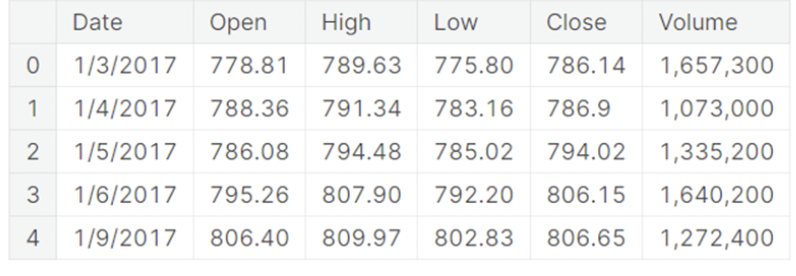

- Welke kolommen ga je volledig weglaten?
    > `Volume`, `Date` kolom weglaten
- Welke kolommen ga je gebruiken als invoer features?
    > Open, Hight, Low, Close
- Is dit een univariate of multivariate tijdsreeks?
    > multivariate
- We wensen de “Close”. waarde te voorspellen voor de volgende dag. Welke type netwerk is er geschikt?
  - Sequentie-naar-sequentie netwerk.
  - Sequentie-naar-vector netwerk.
  - Vector-naar-sequentie netwerk.
  - Encoder-decoder netwerk.
    > We willen één waarde `voorspellen`, dus een seq2vec netwerk.
- Is de volgende uitspraak waar of niet? Verklaar!
    *Als we enkel de “Close”-waarde willen voorspellen dan moet de recurrente laag precies één uitvoer neuron hebben*
    > Niet waar, laag heeft meer units nodig en de output van deze laag os een vector.

10. In het boek wordt de volgende formule gegeven om de uitvoerwaarden vaneen recurrente laag te berekenen:̂
$$
Y(𝑡)= 𝜑(X_{(𝑡)}W_𝑥+\hat{Y}_{(𝑡−1)}W_{\hat{y}}+b)
$$
- Wat is de betekenis van 
  - $X_{(t)}$ De input waarde per tijdstap.
  - $\hat{Y}_{(𝑡−1)}$ De hidden state / output van één stap terug.
  - $W_x$ Het gewicht van x
  - $W_{\hat{y}}$ gewichten van de vorige stap
  - $b$ de bias 
- Geef de vorm (“shape”) van
  - $X_{(t)}$ De input $\rightarrow$ (batch, features)
  - $\hat{Y}_{(𝑡−1)}$ De vorige hidden state of output $\rightarrow$ (batch, units)
  - $W_x$ $\rightarrow$  (aantal_features, aantal_units)
  - $W_{\hat{y}}$ $\rightarrow$  (aantal_features, aantal_units)
  - $b$ $\rightarrow$ aantal `units`

    wanneer een batch grootte van 64 wordt gebruikt

11.In het boek wordt het voorbeeld gegeven van het voorspellen van het aan-tal reizigers op trein en/of bus de volgende dag, gebaseerd op gegevensvan de voorbij 8 weken (56 dagen). 

Beantwoord de volgende vragen over deze architectuur:
- Hoeveel parameters heeft dit model? Toon je berekening.
    $$
    (\text{input\_dim} + \text{timesteps} + \text{units}) + units\
    (1+1+1)
    $$
- Hoeveel recurrente lagen heeft dit model?
    > één recurrente laag `SimpleRNN(1)`
- Hoeveel invoerfeatures heeft dit model?
    > 1 invoer feature

De beschikbare data zien er als volgtuit: Het boek start met de volgende architectuur:

In [97]:
model1 = ks.Sequential([
    #* (batch,timesteps,features) -> (None,1)
    ks.layers.Input(shape=(None, 1)),
    ks.layers.SimpleRNN(1)])
    #! (batch, units) -> (, 1)
    #? (1 + 1 + 1) * 1 = 3

model1.summary()

Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_106 (SimpleRNN)      │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

Omdat deze eerste architectuur te eenvoudig is beschouwt men een tweede model:
Beantwoord de volgende vragen over deze architectuur:
- Hoeveel parameters heeft dit model? Toon je berekening.
    > 1 121
- Hoeveel recurrente lagen heeft dit model?
    > één recurrente laag `SimpleRNN(32)`
- Hoeveel invoer features heeft dit model?
    > 1

In [99]:
model2 = ks.Sequential([
    #* (timestep, feature) -> (None,1)
    ks.layers.Input(shape=(None, 1)),
    ks.layers.SimpleRNN(32),
    #! (batch, units) -> (None, 32)
    #? (input + timestep + units) * units -> (1 + 1 + 32) * 32 = 1 088
    ks.layers.Dense(1)])
    #! (units,) -> (32,) of (None,32)
    #? (input_dim + bias) * units -> (32 + 1 ) * 1 = 33
model2.summary()
#? 1 088 + 33 = 1 121

Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_108 (SimpleRNN)      │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

Is het noodzakelijk om in `model2` deDenselaag toe te voegen? Teken eventueel een figuur om je antwoord te verduidelijken
> Hangt af van wat je doet, maar de RNN laag gaat een vector terug geven met 32 getallen, waarbij de dense daar één getal van maakt

Tenslotte proberen ze een derde model:
Beantwoord de volgende vragen over deze architectuur:
- Hoeveel parameters heeft dit model? Toon je berekening.
    > 5 281
- Hoeveel recurrente lagen heeft dit model?
    > Drie recurrente lagen
- Hoeveel invoer features heeft dit model?
    > één

In [103]:
model3 = ks.Sequential([
    #* (timesteps, feature)
    ks.layers.Input(shape=(None, 1)),
    ks.layers.SimpleRNN(32, return_sequences=True),
    #! (batch, timesteps, units) -> (None, 1, 32)
    #? (input_dim + timesteps +units) -> (1 + 1 + 32) * 32 = 1 088

    #* (batch, timesteps, features) -> (None,None, 32)
    ks.layers.SimpleRNN(32, return_sequences=True),
    #! (batch, timesteps, units) -> (None, None, 32)
    #? (input_dim + timesteps + units) * units -> (32 + 1 + 32) * 32 = 2 080

    #* (batch, timestep, feature) -> (None, None, 32)
    ks.layers.SimpleRNN(32),
    #! (batch, units) -> (None, 32)
    #? (input_dim + 1 + units) * units -> (32 + 1 +32) * 32 = 2 080

    #* (features,) -> (32,)
    ks.layers.Dense(1)])
    #! (input * units) + bias -> (32 * 1) + 1 = 33

model3.summary()
#! 1 088 + 2 080 + 2 080 + 33 = 5 281

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_118 (SimpleRNN)      │ (None, None, 32)       │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_119 (SimpleRNN)      │ (None, None, 32)       │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_120 (SimpleRNN)      │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,281 (20.63 KB)

 Trainable params: 5,281 (20.63 KB)

 Non-trainable params: 0 (0.00 B)

Waarom wordt enkel `return_sequences=True` toegevoegd aan de eerste en tweede laag en niet aan de derde laag?
> Omdat je een vector wilt en vanuit die vector een dense laag doet voor één waarde te krijgen.

Deze drie modellen zijn allemaal voorbeelden van een `RNN-architectuur`

- sequentie-naar-sequentie model
- sequentie-naar-vector model
- vector-naar-sequentie mode

Verklaar je antwoord.
>  S2S vertrekt ven een sequentie en gaat in tijdstappen bewerkingen uitvoeren en zo een sequentie uitkomen.
>
> S2V vertrekt van een seqientie en gaat ook via tijdstappen aan een vector komen door alleen het laaste output te nemen.
> 
> V2S vertrekt van een vector en in elk tijdstap die vector in te geven om totslot een sequentie te krijgen.

We wensen nu de reizigersaantallen voor de volgende 7 dagen te voorspellen. Toon hoe de code voor model2 moet aangepast worden

In [105]:
model2 = ks.Sequential([
    #* (timestep, feature) -> (None,1)
    ks.layers.Input(shape=(None, 1)),
    ks.layers.SimpleRNN(32),
    ks.layers.Dense(7)])
model2.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_122 (SimpleRNN)      │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,319 (5.15 KB)

 Trainable params: 1,319 (5.15 KB)

 Non-trainable params: 0 (0.00 B)

Nu deze aanpassing is `model2` een voorbeeld van een
- sequentie-naar-sequentie model
- sequentie-naar-vector model
- vector-naar-sequentie model

Verklaar je antwoord
> sequentie-naar-vector model, want we hebben op laaste RNN laag return_sequence=false die daar een vector stuur die we daarna met dense naar 7 getallen veranderen